# **IE7275 Data Mining in Engineering**
# **Fall 2025 semester**
### -- STUDENT VERSION --

---
#### **Guidelines for Completing and Submitting This Notebook**

Please follow these instructions carefully. Completing all parts of this notebook is required to receive full credit:

#### **You must:**
- **Answer all questions** and reflection tasks using your own words.
- **Summarize every reflection task** clearly and completely.
- **Fill out all missing code cells** — do not leave any code blocks empty.
- **Run your notebook** to ensure that all outputs and visualizations are generated and visible.
- **Convert your completed notebook** to **PDF** or **HTML** format before submission.
- **Submit the file to Canvas** before the deadline.

#### **Academic Integrity Reminder**:
- You must complete this notebook individually.
- Do not copy answers or code from classmates, online sources, or use tools like **ChatGPT** or other **AI writing or code generation tools**.
- Keep in mind that if you use such tools, your answer may be **identical or highly similar** to others who do the same — in this case, we will treat it as copying and apply a **50% penalty** to your assignment grade.

By submitting this notebook, you confirm that all work is your own and that you have followed these guidelines.


---



## **Module 4: Association Rule Mining and Recommendation Systems (Part 2)**

#### **Module 4.7: Visualizing Association Patterns**

Visualization plays a key role in interpreting and communicating the results of association rule mining. Effective visual tools help uncover complex relationships and patterns that might be missed in raw numerical outputs.

Common visualization techniques include:

- **Heatmaps:**  
  Display the strength of associations between itemsets using color gradients, making it easy to spot strong or weak relationships.

- **Network Graphs:**  
  Represent items as nodes and association rules as edges, illustrating the interconnectedness and flow between items.

- **Itemset Matrices:**  
  Show the presence or absence of items across transactions or rules, helping to identify frequent co-occurrences.

By leveraging these visual tools, analysts can better understand the structure of the data, prioritize rules, and present findings to stakeholders more effectively.

---

#### **Exercise 1: Visualizing Association Metrics with a Heatmap**

#### Objective:
Learn how to create a heatmap to visualize the strength of associations between frequent item pairs using support, confidence, or lift values.

#### Instructions:

1. **Generate Rules**  
   Use the Apriori algorithm to generate association rules with a minimum support of 0.3 and minimum confidence of 0.6.

2. **Filter Rules with Antecedent and Consequent of Length 1**  
   To simplify the visualization, keep only rules where both the antecedent and the consequent contain exactly one item.

3. **Prepare the Data for Visualization**  
   - Convert the antecedents and consequents into string labels.
   - Pivot the rule values (e.g., lift or confidence) into a matrix format suitable for heatmaps.

4. **Create a Heatmap**  
   - Use `seaborn.heatmap()` or `plotly.express.imshow()` to visualize the matrix.
   - Choose lift or confidence as the heatmap values.
   - Add appropriate axis labels and a colorbar.

5. **Interpret the Result**  
   Identify item pairs with strong associations and explain what those values mean in context.

---


In [1]:
# Step 1: Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Define transaction data
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

# Step 3: Encode the dataset
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)


In [2]:
# Step 5: Filter rules with antecedents and consequents of length 1
rules_simple = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 1)) &
    (rules['consequents'].apply(lambda x: len(x) == 1))
].copy()

# Step 6: Convert frozensets to strings for plotting
rules_simple['antecedent'] = rules_simple['antecedents'].apply(lambda x: list(x)[0])
rules_simple['consequent'] = rules_simple['consequents'].apply(lambda x: list(x)[0])

# Step 7: Pivot the data to create a matrix (e.g., for lift)
heatmap_data = rules_simple.pivot(index='antecedent', columns='consequent', values='lift')


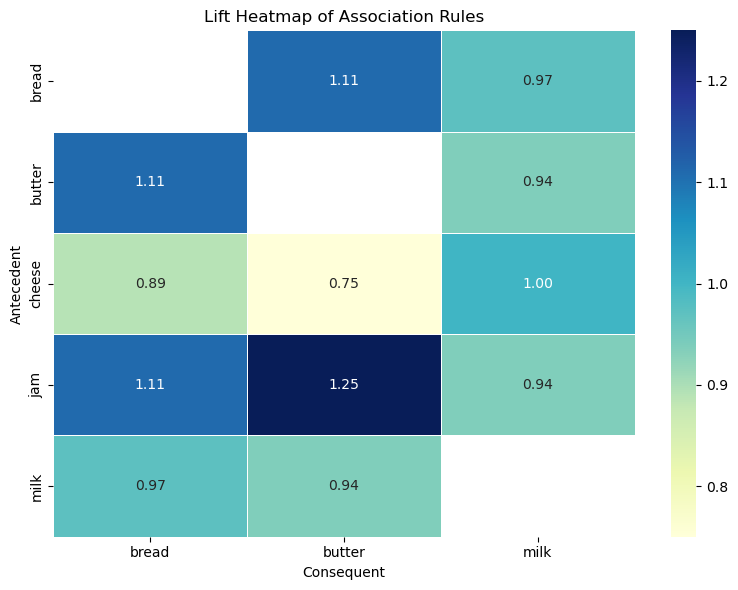

In [3]:
# Step 8: Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Lift Heatmap of Association Rules')
plt.xlabel('Consequent')
plt.ylabel('Antecedent')
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise ,we have showed how the complex data patterns can be understandable by teh visual tools such as heat map ,also we prepare the transactional data by the one hot encoding where we use the apriori algorithm where we implement the itemsets and generate the association rules .Here we transform the rules into the matrix format where is it suitable for the visualization.Hence by plotting the heat map of the lift valueswhere we can identify the stringest associations between the single items where it would be difficult to spot in the raw data table.









#### **Exercise 2: Visualizing Association Rules with a Network Graph**

#### Objective:
Learn how to represent association rules using a network graph, where items are nodes and rules are directed edges from antecedents to consequents. This helps illustrate how items influence each other and identify central items in the network.

#### Instructions:

1. **Generate Rules**  
   Use the Apriori algorithm to generate association rules with a minimum support of 0.3 and minimum confidence of 0.6.

2. **Filter Rules**  
   Retain rules where both the antecedents and consequents contain only one item to simplify the graph.

3. **Convert to Edges and Nodes**  
   - Extract the item pairs and use them to form directed edges.
   - Use the `networkx` library to build and visualize the graph.

4. **Draw the Graph**  
   - Use `spring_layout()` or `circular_layout()` for positioning.
   - Label nodes with item names.
   - Adjust edge thickness based on lift or confidence.

5. **Interpret the Graph**  
   Identify which items are commonly found as antecedents or consequents, and which items act as hubs (highly connected nodes) in the rule network.

---


In [4]:
#!conda install -c conda-forge networkx

In [5]:
# Step 1: Import required libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Define transaction data
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

# Step 3: Encode the dataset
te = TransactionEncoder()
df_array = te.fit_transform(transactions)
df = pd.DataFrame(df_array, columns=te.columns_)

# Step 4: Generate frequent itemsets and rules
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Step 5: Filter rules with single-item antecedents and consequents
rules_simple = rules[
    (rules['antecedents'].apply(lambda x: len(x) == 1)) &
    (rules['consequents'].apply(lambda x: len(x) == 1))
].copy()

# Step 6: Convert frozensets to strings for visualization
rules_simple['antecedent'] = rules_simple['antecedents'].apply(lambda x: list(x)[0])
rules_simple['consequent'] = rules_simple['consequents'].apply(lambda x: list(x)[0])


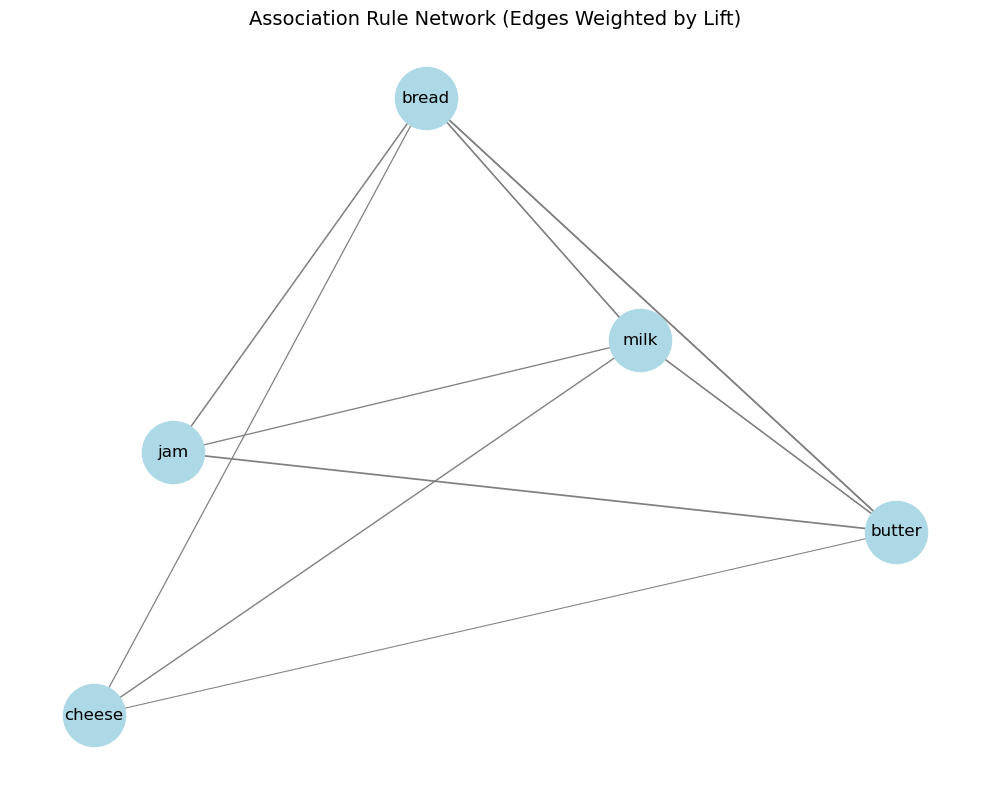

In [6]:
# Step 7: Create network graph
G = nx.DiGraph()

for _, row in rules_simple.iterrows():
    a = row['antecedent']
    c = row['consequent']
    lift = row['lift']
    G.add_edge(a, c, weight=lift)

# Step 8: Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw edges with weights (lift as thickness)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True, width=edge_weights)

plt.title("Association Rule Network (Edges Weighted by Lift)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise ,the network graphs are very good for understanding the inter connected of the items where it helps to identify the items which are in the central hub in the network and purchasing one item can lead to another item in purchase .Also the exercise focuses on visualizing association rules using a network graph .It has the standard steps of data preparation and the rule generation ,where we will create the direct graph in which the nodes were the items ,edges are the rules,where the thickness of the edges represents the lift metric.





#### **Exercise 3: Visualizing Itemset Presence with a Binary Matrix**

#### Objective:
Learn how to visualize the presence or absence of items across transactions using a binary itemset matrix. This technique helps identify frequently co-occurring items and compare transaction compositions.

#### Instructions:

1. **Prepare the Transaction Dataset**  
   Use the same list of transactions and apply one-hot encoding using `TransactionEncoder`.

2. **Create the Binary Matrix**  
   The resulting DataFrame should have:
   - Rows representing individual transactions
   - Columns representing items
   - 1 if the item is present, 0 otherwise

3. **Visualize the Matrix**  
   - Use `seaborn.heatmap()` or `matplotlib.pyplot.imshow()` to display the binary matrix.
   - Add appropriate labels and formatting for clarity.

4. **Interpret the Matrix**  
   Identify which items appear most frequently and which items are commonly bought together by scanning for overlapping rows of 1s.

---


In [7]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

# Step 2: Define transaction data
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'bread', 'cheese'],
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'butter', 'jam'],
    ['bread', 'butter', 'jam'],
    ['milk', 'cheese'],
    ['milk', 'bread', 'butter', 'cheese'],
    ['milk', 'bread', 'jam', 'butter', 'cheese']
]

# Step 3: Apply TransactionEncoder to create binary matrix
te = TransactionEncoder()
df_array = te.fit_transform(transactions)
df = pd.DataFrame(df_array, columns=te.columns_)


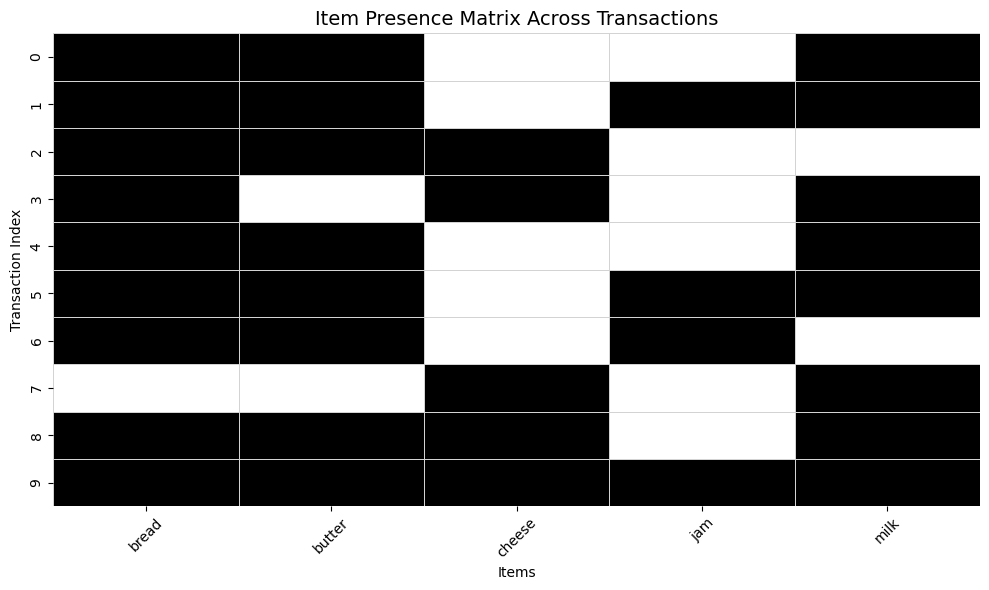

In [8]:
# Step 4: Plot item presence as a binary matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.astype(int), cmap='Greys', cbar=False, linewidths=0.5, linecolor='lightgray')

plt.title("Item Presence Matrix Across Transactions", fontsize=14)
plt.xlabel("Items")
plt.ylabel("Transaction Index")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---


In this exercise,demonstrated the value of the simple tool for gaining immediate insight into data density and patterns.Visualizing item presence across transactions using the binary matrix heatmap ,afterwe prepare the data with the one hot encoding ,it results in the dataframe which provides a clear visual representation of the item co-occurance with black squares indicating the presence of an item in a transaction.The viusalization allows us to scan the appearing item pairs.  




#### **Module 4.8: Market Basket Analysis in Retail**

Market Basket Analysis is a classic application of association rule mining used extensively in retail to understand customer purchasing behavior. It reveals which products are frequently bought together, enabling businesses to optimize product placement, promotions, and inventory management.

Key benefits include:
- **Product Bundling:** Creating offers by grouping frequently co-purchased items.
- **Store Layout Optimization:** Arranging products to encourage cross-selling.
- **Targeted Marketing:** Designing personalized promotions based on purchasing patterns.

By analyzing transactional data, retailers can increase sales, improve customer experience, and gain a competitive edge in the market.

---

#### **Exercise 4: Performing Market Basket Analysis for Retail Insights**

#### Objective:
Simulate a market basket dataset and perform association rule mining to discover product bundling opportunities and insights that could guide promotional strategies in a retail setting.

#### Instructions:

1. **Simulate Retail Transaction Data**  
   Create a dataset representing customer purchases at a small grocery store. Include common products such as milk, bread, eggs, cheese, butter, soda, chips, and fruits.

2. **Preprocess Data**  
   Convert transactions into a binary matrix using `TransactionEncoder`.

3. **Generate Frequent Itemsets and Rules**  
   Use the Apriori algorithm to find frequent itemsets and generate association rules with minimum support of 0.2 and confidence of 0.5.

4. **Analyze the Rules**  
   - Identify the strongest product combinations based on lift and confidence.
   - Interpret results for potential product bundling (e.g., "If customers buy bread and butter, they’re likely to buy jam").

5. **Business Recommendations**  
   Based on the rules, suggest at least two bundling or promotional strategies that a retailer could use to increase cross-selling or enhance the shopping experience.

---


In [9]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Simulate retail transaction data
transactions = [
    ['milk', 'bread', 'butter'],
    ['milk', 'bread', 'eggs'],
    ['bread', 'butter', 'jam'],
    ['milk', 'eggs', 'cheese'],
    ['bread', 'butter'],
    ['milk', 'soda', 'chips'],
    ['chips', 'soda', 'cheese'],
    ['milk', 'bread', 'butter', 'jam'],
    ['eggs', 'cheese', 'butter'],
    ['bread', 'jam', 'fruits'],
    ['milk', 'bread', 'chips'],
    ['milk', 'fruits'],
    ['cheese', 'butter', 'bread'],
    ['milk', 'eggs', 'fruits'],
    ['soda', 'chips']
]

# Step 3: One-hot encode the transaction data
te = TransactionEncoder()
df_array = te.fit_transform(transactions)
df = pd.DataFrame(df_array, columns=te.columns_)

# Step 4: Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


In [10]:
# Step 6: Sort and display top rules by lift
top_rules = rules.sort_values(by='lift', ascending=False).head(10)
print("Top Association Rules (Sorted by Lift):")
print(top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top Association Rules (Sorted by Lift):
  antecedents consequents   support  confidence     lift
5     (chips)      (soda)  0.200000    0.750000  3.75000
6      (soda)     (chips)  0.200000    1.000000  3.75000
2       (jam)     (bread)  0.200000    1.000000  1.87500
0     (bread)    (butter)  0.333333    0.625000  1.56250
1    (butter)     (bread)  0.333333    0.833333  1.56250
7      (eggs)      (milk)  0.200000    0.750000  1.40625
3      (milk)     (bread)  0.266667    0.500000  0.93750
4     (bread)      (milk)  0.266667    0.500000  0.93750


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise,it shows that complete end to end process from raw data to the business strategy .It involves the complete market analysis workflow.It simulated the dataset ,where it is preprocessed with the one hot encoding adn then use the apriori algorithm to look at teh frequent itemsets and association rules .Here we can interpret that by the rules of lift it identifies the most surprising and the meaningful product combinations into the business recommendations. 






#### **Module 4.9: Multilevel and Multidimensional Association Rules**

Multilevel and multidimensional association rules extend basic rule mining by considering hierarchies or multiple attributes simultaneously.

- **Multilevel Rules:**  
  Discover associations across different levels of a taxonomy, such as category → brand → product. This helps identify patterns at varying granularities.

- **Multidimensional Rules:**  
  Incorporate multiple attributes beyond items, such as time, location, or customer demographics, to find richer and context-aware associations.

These advanced rules provide deeper insights and more actionable knowledge, allowing businesses to tailor strategies based on complex interactions in the data.

---

#### **Exercise 5: Mining Multilevel Association Rules Using Product Categories**

#### Objective:
Simulate a transaction dataset with a hierarchical structure (e.g., category → subcategory → product), and perform association rule mining at multiple levels of abstraction.

#### Instructions:

1. **Simulate a Hierarchical Dataset**  
   Create transactions where items belong to a hierarchy (e.g., `dairy:milk`, `dairy:cheese`, `beverage:soda`, `bakery:bread`).

2. **Split Product Levels**  
   Break down items into `category` and `product` using string processing.

3. **Mine Rules at Product Level**  
   Use one-hot encoding and apply Apriori to find rules at the product level (e.g., `milk` → `cheese`).

4. **Mine Rules at Category Level**  
   Aggregate items by category and perform rule mining again to observe high-level patterns (e.g., `dairy` → `bakery`).

5. **Compare Rules Across Levels**  
   Discuss how patterns at the category level differ from those at the product level and why both views are useful.

---

In [11]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Create multilevel transaction data (category:product)
transactions = [
    ['dairy:milk', 'bakery:bread', 'dairy:cheese'],
    ['dairy:milk', 'bakery:bread', 'dairy:butter'],
    ['beverage:soda', 'snacks:chips', 'dairy:milk'],
    ['bakery:bread', 'bakery:croissant'],
    ['dairy:cheese', 'snacks:chips'],
    ['dairy:butter', 'bakery:bread', 'snacks:chocolate'],
    ['dairy:milk', 'bakery:muffin', 'beverage:soda'],
    ['beverage:juice', 'snacks:chips', 'dairy:cheese'],
    ['dairy:milk', 'bakery:bread'],
    ['bakery:croissant', 'dairy:cheese', 'beverage:soda']
]


In [12]:
# Step 3: One-hot encode product-level items
te = TransactionEncoder()
df_product = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)
print(df_product)


   bakery:bread  bakery:croissant  bakery:muffin  beverage:juice  \
0          True             False          False           False   
1          True             False          False           False   
2         False             False          False           False   
3          True              True          False           False   
4         False             False          False           False   
5          True             False          False           False   
6         False             False           True           False   
7         False             False          False            True   
8          True             False          False           False   
9         False              True          False           False   

   beverage:soda  dairy:butter  dairy:cheese  dairy:milk  snacks:chips  \
0          False         False          True        True         False   
1          False          True         False        True         False   
2           True         Fals

In [13]:
# Step 4: Generate product-level frequent itemsets and rules
product_itemsets = apriori(df_product, min_support=0.2, use_colnames=True)
product_rules = association_rules(product_itemsets, metric="confidence", min_threshold=0.5)

print("Product-Level Association Rules:")
print(product_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Product-Level Association Rules:
       antecedents     consequents  support  confidence      lift
0   (dairy:butter)  (bakery:bread)      0.2    1.000000  2.000000
1     (dairy:milk)  (bakery:bread)      0.3    0.600000  1.200000
2   (bakery:bread)    (dairy:milk)      0.3    0.600000  1.200000
3  (beverage:soda)    (dairy:milk)      0.2    0.666667  1.333333
4   (dairy:cheese)  (snacks:chips)      0.2    0.500000  1.666667
5   (snacks:chips)  (dairy:cheese)      0.2    0.666667  1.666667


In [14]:
# Step 5: Extract only category from each item
def extract_category(items):
    return frozenset([i.split(":")[0] for i in items])

# Step 6: Convert transactions to category-level
category_transactions = [list(set([item.split(":")[0] for item in trans])) for trans in transactions]


In [15]:
# Step 7: One-hot encode category-level transactions
te_cat = TransactionEncoder()
df_category = pd.DataFrame(te_cat.fit_transform(category_transactions), columns=te_cat.columns_)
print(df_category)

   bakery  beverage  dairy  snacks
0    True     False   True   False
1    True     False   True   False
2   False      True   True    True
3    True     False  False   False
4   False     False   True    True
5    True     False   True    True
6    True      True   True   False
7   False      True   True    True
8    True     False   True   False
9    True      True   True   False


In [16]:
# Step 8: Generate category-level frequent itemsets and rules
category_itemsets = apriori(df_category, min_support=0.2, use_colnames=True)
category_rules = association_rules(category_itemsets, metric="confidence", min_threshold=0.5)

print("\nCategory-Level Association Rules:")
print(category_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Category-Level Association Rules:
           antecedents        consequents  support  confidence      lift
0           (beverage)           (bakery)      0.2    0.500000  0.714286
1             (bakery)            (dairy)      0.6    0.857143  0.952381
2              (dairy)           (bakery)      0.6    0.666667  0.952381
3           (beverage)            (dairy)      0.4    1.000000  1.111111
4           (beverage)           (snacks)      0.2    0.500000  1.250000
5             (snacks)         (beverage)      0.2    0.500000  1.250000
6             (snacks)            (dairy)      0.4    1.000000  1.111111
7   (beverage, bakery)            (dairy)      0.2    1.000000  1.111111
8    (beverage, dairy)           (bakery)      0.2    0.500000  0.714286
9           (beverage)    (bakery, dairy)      0.2    0.500000  0.833333
10  (beverage, snacks)            (dairy)      0.2    1.000000  1.111111
11   (beverage, dairy)           (snacks)      0.2    0.500000  1.250000
12     (dairy, s

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise ,the product level rules the offer of the specific bundling opportunities ,where the category level rules the certain strategic patterns which helps to store the layout and the broader marketing .Explored the multilevel association by mining patternsunder both the product and category levels .Here we prepared the dataset with a certain order which makes the analysis twice,first on the particular product and then on the aggregated categories ,here the takeaway is that at each level it provides a different value. 

#### **Exercise 6: Discovering Multidimensional Rules with Customer and Time Attributes**

#### Objective:
Extend transaction data with additional dimensions (e.g., customer segment, time of day) and mine association rules that incorporate these attributes.

#### Instructions:

1. **Simulate Multidimensional Transaction Data**  
   Each transaction should include:
   - Purchased items (e.g., `milk`, `bread`)
   - Metadata (e.g., `customer_type:student`, `time:morning`)

2. **Format the Data**  
   Treat each item and attribute (e.g., `time=morning`, `customer_type=student`) as part of the transaction for encoding.

3. **Apply One-Hot Encoding and Apriori**  
   Encode all elements and generate rules using the Apriori algorithm with a support threshold (e.g., 0.2) and confidence (e.g., 0.6).

4. **Filter for Multidimensional Rules**  
   Extract rules that involve both product items and contextual attributes (e.g., `customer_type=student` → `soda`).

5. **Interpret the Results**  
   Discuss how these rules can support targeted marketing or time-sensitive promotions.

---

In [17]:
# Step 1: Import required libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Simulate multidimensional transactions (items + context attributes)
transactions = [
    ['milk', 'bread', 'customer:student', 'time:morning'],
    ['milk', 'eggs', 'customer:student', 'time:afternoon'],
    ['bread', 'jam', 'customer:adult', 'time:morning'],
    ['milk', 'bread', 'butter', 'customer:adult', 'time:evening'],
    ['eggs', 'cheese', 'customer:senior', 'time:morning'],
    ['bread', 'butter', 'jam', 'customer:student', 'time:afternoon'],
    ['milk', 'jam', 'customer:adult', 'time:evening'],
    ['cheese', 'milk', 'customer:student', 'time:morning'],
    ['soda', 'chips', 'customer:teen', 'time:evening'],
    ['milk', 'chips', 'soda', 'customer:teen', 'time:afternoon'],
]

# Step 3: One-hot encode transactions
te = TransactionEncoder()
df = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Step 4: Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


In [18]:
# Step 6: Filter for rules involving contextual attributes
multidim_rules = rules[
    rules['antecedents'].apply(lambda x: any('customer:' in item or 'time:' in item for item in x))
    | rules['consequents'].apply(lambda x: any('customer:' in item or 'time:' in item for item in x))
]

In [19]:
# Step 7: Display selected multidimensional rules
print("Multidimensional Association Rules (Contextual Attributes Involved):")
multidim_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(6)

Multidimensional Association Rules (Contextual Attributes Involved):


,antecedents,consequents,support,confidence,lift
2,(customer:adult),(bread),0.2,0.666667,1.666667
3,(bread),(customer:adult),0.2,0.500000,1.666667
4,(bread),(customer:student),0.2,0.500000,1.250000
5,(customer:student),(bread),0.2,0.500000,1.250000
9,(time:morning),(bread),0.2,0.500000,1.250000
10,(bread),(time:morning),0.2,0.500000,1.250000


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise we could check how the transaction data with the metadata can lead to precise business intelligence.It also extends the concept of the rule mining to a multidimensional context.The stimulated transactions includes the purchased items has the contextual attributes like customer_type and time .These attributes in the analysis identifies the more specific and actionable rules. 




#### **Module 4.10: Challenges in Rule Mining and Optimization**

Association rule mining faces several challenges that impact the quality and efficiency of results:

- **Rule Explosion:**  
  Generating an overwhelming number of rules, many of which may be redundant or uninteresting.

- **Uninteresting Rules:**  
  Rules that are statistically valid but lack practical significance or actionable insights.

- **Computational Inefficiency:**  
  High computational cost and memory usage, especially with large and dense datasets.

To address these challenges, techniques such as pruning, advanced constraints, efficient algorithms, and domain knowledge integration are essential for extracting valuable rules effectively.

---

#### **Exercise 7: Exploring Rule Explosion and Redundancy**

#### Objective:
Understand the concept of rule explosion and how large numbers of redundant rules can clutter the result set, making interpretation difficult.

#### Instructions:
1. Generate a transaction dataset with many overlapping item combinations (at least 15–20 transactions).
2. Use the Apriori algorithm with low `min_support` and `min_confidence` thresholds.
3. Count and display the total number of rules generated.
4. Identify duplicate or redundant rules with the same antecedents or consequents.
5. Discuss how such rule volume impacts real-world decision-making and interpretation.

---

In [20]:
# Step 1: Import necessary libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Simulate a dataset with overlapping items (rule explosion scenario)
transactions = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'bread', 'butter'],
    ['bread', 'butter', 'jam'],
    ['milk', 'bread', 'jam'],
    ['eggs', 'milk', 'bread'],
    ['milk', 'bread', 'butter', 'jam'],
    ['milk', 'butter'],
    ['bread', 'jam'],
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'eggs'],
    ['eggs', 'butter'],
    ['milk', 'bread'],
    ['butter', 'jam'],
    ['milk', 'jam'],
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread'],
    ['milk', 'eggs', 'jam']
]

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
df = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Step 4: Apply Apriori with low thresholds to trigger rule explosion
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Step 5: Display total number of rules
print(f"Total rules generated: {len(rules)}")

# Step 6: Check for redundancy (same antecedent or consequent)
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequent_len'] = rules['consequents'].apply(lambda x: len(x))
duplicate_antecedents = rules.duplicated(subset='antecedents', keep=False)
duplicate_consequents = rules.duplicated(subset='consequents', keep=False)

# Display some of the redundant rules
print("\nRedundant Antecedent Rules:")
print(rules[duplicate_antecedents][['antecedents', 'consequents', 'confidence', 'lift']].head())

print("\nRedundant Consequent Rules:")
print(rules[duplicate_consequents][['antecedents', 'consequents', 'confidence', 'lift']].head())


Total rules generated: 13

Redundant Antecedent Rules:
  antecedents consequents  confidence      lift
0     (bread)    (butter)    0.500000  1.000000
1    (butter)     (bread)    0.700000  1.000000
2       (jam)     (bread)    0.571429  0.816327
3      (milk)     (bread)    0.714286  1.020408
4     (bread)      (milk)    0.714286  1.020408

Redundant Consequent Rules:
  antecedents consequents  confidence      lift
0     (bread)    (butter)    0.500000  1.000000
1    (butter)     (bread)    0.700000  1.000000
2       (jam)     (bread)    0.571429  0.816327
3      (milk)     (bread)    0.714286  1.020408
4     (bread)      (milk)    0.714286  1.020408


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise it demnostrates that the importance selecting the thresholds and emplying filtering the techniques to manage the output and extract the most valuable and the non redundant insights.It also highlights that the real world problem of rule explosion and redudndancy ,by setting the low support and confidence thresholds where it generates the large number of rules.We can also understand that the high volume will be overwhelming where it causes many rules which is redundant such as multiple rules with the same different consequents.






#### **Exercise 8: Filtering Uninteresting Rules Using Domain Knowledge**

#### Objective:
Learn how to filter out statistically strong but practically irrelevant rules using business logic and domain constraints.

#### Instructions:
1. Simulate a transaction dataset with common shopping items.
2. Use the Apriori algorithm to extract association rules.
3. Create a list of "irrelevant combinations" based on domain logic (e.g., milk → soap).
4. Remove rules that match the irrelevant combinations.
5. Compare the filtered and unfiltered rule sets and interpret the impact on quality.

---


In [21]:
# Step 1: Import libraries
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 2: Simulate a transaction dataset with more hygiene → food combinations
transactions = [
    ['soap', 'milk'],
    ['shampoo', 'bread'],
    ['toothpaste', 'butter'],
    ['milk', 'bread'],
    ['milk', 'soap'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['soap', 'shampoo', 'milk'],
    ['bread', 'soap'],
    ['butter', 'shampoo'],
    ['toothpaste', 'milk'],
    ['soap', 'toothpaste'],
    ['bread', 'toothpaste'],
    ['milk', 'bread', 'shampoo'],
    ['shampoo', 'milk'],
    ['soap', 'bread'],
    ['toothpaste', 'milk', 'butter'],
    ['shampoo', 'butter'],
    ['milk', 'shampoo'],
    ['soap', 'bread', 'butter']
]

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
df = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Step 4: Apply Apriori
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Step 5: Define hygiene and food sets
hygiene = {'soap', 'shampoo', 'toothpaste'}
food = {'milk', 'bread', 'butter'}

# Step 6: Flag uninteresting rules (hygiene → food)
def is_uninteresting(row):
    return any(a in hygiene for a in row['antecedents']) and any(c in food for c in row['consequents'])

rules['uninteresting'] = rules.apply(is_uninteresting, axis=1)

# Step 7: Filter out uninteresting rules
filtered_rules = rules[~rules['uninteresting']]

# Step 8: Display summary
print("Total rules generated:", len(rules))
print("Rules filtered out as uninteresting:", rules['uninteresting'].sum())
print("\nFiltered Rules (domain-relevant):")
print(filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Total rules generated: 2
Rules filtered out as uninteresting: 1

Filtered Rules (domain-relevant):
  antecedents consequents  support  confidence      lift
0      (milk)   (shampoo)      0.2         0.4  1.142857


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---


In this exercise ,here we will integrate the domain knowledge where it is crucial step for making the results where it is actionable for the business stakeholders.It is also a exercise focused on filtering out the uninteresting rules where we use the domain knowledge .we stimulared a dataset where statiscally strong but logically irrelevant rules.A simple function to flag and remove these rules based on a defined business constraint .Here in this exercise they taught us that the statistical significance is equally important.




#### **Exercise 9: Optimizing Rule Mining Efficiency on Large Datasets**

#### Objective:
Understand the computational challenges of association rule mining and apply techniques to improve runtime and memory usage when working with larger or denser datasets.

#### Instructions:

1. **Generate a Large Synthetic Dataset**  
   Simulate 1,000 transactions, where each transaction contains a random subset of items from a pool of 20 grocery products.

2. **One-Hot Encode the Data**  
   Use `TransactionEncoder` to convert the list of transactions into a binary format.

3. **Apply Apriori with Performance Constraints**  
   - Set a relatively high `min_support` value (e.g., 0.2) to reduce the number of candidate itemsets.
   - Limit the `max_len` parameter to control the size of itemsets.

4. **Monitor Performance**  
   Use Python’s `time` module to measure how long the algorithm takes to run and how results vary with different support thresholds and max lengths.

5. **Evaluate Trade-Offs**  
   Record the number of frequent itemsets generated and discuss how adjusting parameters impacts performance and rule discovery.

6. **Bonus** (Optional):  
   Compare performance using `Apriori` vs. `FP-Growth` on the same dataset.

---


In [22]:
import pandas as pd
import random
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth

# Step 1: Generate a larger synthetic transaction dataset
random.seed(42)
items = [f'item_{i}' for i in range(1, 51)]  # 50 unique items

transactions = []
for _ in range(10000):  # 10,000 transactions
    num_items = random.randint(3, 10)
    transaction = random.sample(items, num_items)
    transactions.append(transaction)

# Step 2: One-hot encode the dataset
te = TransactionEncoder()
df = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)

# Step 3: Apply Apriori with lower min_support and increased max_len
start_time_ap = time.time()
frequent_itemsets_ap = apriori(df, min_support=0.05, use_colnames=True, max_len=4)
end_time_ap = time.time()

# Step 4: Apply FP-Growth with the same parameters
start_time_fp = time.time()
frequent_itemsets_fp = fpgrowth(df, min_support=0.05, use_colnames=True, max_len=4)
end_time_fp = time.time()

# Step 5: Collect results
ap_runtime = end_time_ap - start_time_ap
fp_runtime = end_time_fp - start_time_fp
ap_count = len(frequent_itemsets_ap)
fp_count = len(frequent_itemsets_fp)

results = pd.DataFrame({
    'Algorithm': ['Apriori', 'FP-Growth'],
    'Runtime (seconds)': [ap_runtime, fp_runtime],
    'Frequent Itemsets Found': [ap_count, fp_count]
})

results


,Algorithm,Runtime (seconds),Frequent Itemsets Found
0,Apriori,0.035935,50
1,FP-Growth,0.238653,50


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise,there is a large datasets ,where it more efficient algorithm like FP -Growth or the higher minimum support threshold where it is necessary to make all the analysis that is feasible and prevent any excessive runtime.It demonstrates the computational challenges of rule mining on the larger datasets where it generates large sybthetic dataset where the performance of the Apriori and the FP-Growth algorithms.We got to know that the min_support and max_len have a significant impact on the performance by controlling the itemsets of the candidates.




#### **Module 4.11: Introduction to Recommendation Systems**

Recommendation systems are tools that predict user preferences and suggest relevant items, helping users discover products, services, or content. They play a vital role in e-commerce, streaming services, and social media platforms.

This sub-module introduces the basic concepts of recommendation engines and their connection to association rule mining. You will learn how co-occurrence patterns and user-item interactions form the foundation for generating personalized recommendations.

Understanding these principles prepares you for exploring various recommendation techniques including association-based, collaborative filtering, and hybrid methods.

---

#### **Exercise 10: Building a Simple Recommendation System Using Association Rules**

#### Objective:
Learn how to use association rule mining to build a simple product recommendation system that suggests items based on prior co-purchase patterns.

#### Instructions:

1. **Create Transactional Data**  
   Simulate a small transactional dataset where each transaction represents items purchased by a user. Include at least 10 transactions with varied item combinations.

2. **Preprocess the Data**  
   Convert the list of transactions into a binary encoded DataFrame using one-hot encoding (`TransactionEncoder` from `mlxtend`).

3. **Mine Association Rules**  
   - Use the **Apriori** algorithm to identify frequent itemsets with a suitable minimum support threshold.
   - Generate association rules from the itemsets using `association_rules()` with confidence as the metric.

4. **Create a Simple Recommender Function**  
   Write a function `recommend_items(input_items, rules)` that:
   - Accepts a list of items a user has purchased (`input_items`).
   - Filters rules where the antecedents match the input items.
   - Returns the top recommended consequents (items) sorted by confidence or lift.

5. **Test the Recommender**  
   Call the recommender function with different user inputs and display the recommended items.

This exercise introduces how simple rule-based systems can be used to generate personalized item suggestions based on historical transaction patterns.

---

In [23]:
# Step 1: Simulate transactional data
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'cookies'],
    ['milk', 'bread', 'cookies'],
    ['bread', 'butter', 'cookies'],
    ['milk', 'bread'],
    ['cookies'],
    ['milk', 'butter'],
    ['bread', 'cookies'],
    ['milk', 'bread', 'butter', 'cookies']
]

# Step 2: One-hot encode the transactions
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

# Step 3: Apply Apriori and generate rules
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)



In [24]:
# Step 4: Define recommendation function
def recommend_items(input_items, rules_df, top_n=3):
    """
    Recommend items based on association rules.
    """
    from collections import Counter

    # Ensure input is a set for comparison
    input_set = set(input_items)

    # Filter rules where antecedents are a subset of input
    filtered = rules_df[rules_df['antecedents'].apply(lambda x: input_set.issuperset(x))]

    # Flatten consequents and count frequency or confidence
    recommendations = []
    for _, row in filtered.iterrows():
        for item in row['consequents']:
            if item not in input_set:
                recommendations.append((item, row['confidence'], row['lift']))

    # Rank by confidence and lift
    ranked = sorted(recommendations, key=lambda x: (-x[1], -x[2]))
    seen = set()
    top_recs = []

    for item, conf, lift in ranked:
        if item not in seen:
            top_recs.append(item)
            seen.add(item)
        if len(top_recs) == top_n:
            break

    return top_recs


In [25]:
# Step 5: Test the recommender
user_input = ['milk']
recommended_items = recommend_items(user_input, rules)
print(f"Recommended items for {user_input}: {recommended_items}")

Recommended items for ['milk']: ['bread']


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---


In this exercise,it demonstrates a practical application where the concepts provide the personalized suggestions of the item.Building a simple association based recommendation system,where a workflow of the data encoding rule generation create a function which takes the user items and returns the recommendations by matching the rules.The association rules can be applied on the functional recommendation engine.

#### **Module 4.12: Association-Based Recommendation Engines**

Association-based recommendation engines leverage frequent itemsets and association rules to suggest items commonly bought or used together.

Key concepts include:
- Using rules like “people who bought this also bought that” to generate recommendations.
- Mining frequent co-occurrence patterns in transaction data to identify related items.
- Implementing simple, interpretable recommendation systems based on discovered associations.

These recommenders are effective for market basket data and provide quick, rule-driven suggestions without requiring extensive user profiles or complex models.

---

#### **Exercise 11: Implementing an Association-Based Recommender for Market Basket Data**

#### Objective:
Learn how to build a rule-driven recommendation engine using frequent itemsets and association rules. This approach mimics the logic of “customers who bought this also bought that,” making it ideal for retail applications.

#### Instructions:

1. **Load or Simulate Transactional Data**  
   Use a realistic transaction list (or simulate your own) representing customer purchases across a store.

2. **Transform to Binary Matrix**  
   Apply `TransactionEncoder` from `mlxtend` to convert the list of item transactions into a binary-encoded DataFrame.

3. **Generate Frequent Itemsets**  
   Use the Apriori algorithm to extract frequent itemsets above a defined support threshold (e.g., 0.2).

4. **Mine Association Rules**  
   Generate rules from the itemsets using confidence as the metric (minimum 0.6). Inspect top rules.

5. **Build a Simple Recommender**  
   Create a function that:
   - Takes a list of input items (user basket),
   - Filters the rules with matching antecedents,
   - Returns top recommended items using confidence and lift as ranking criteria.

6. **Test Your Engine**  
   Try the recommender with different baskets (e.g., `['bread']`, `['milk', 'cookies']`) and print the recommended outputs.

7. **Interpret the Output**  
   Explain how recommendations were derived and whether they are reasonable based on the rules.

---



In [26]:
# Step 1: Simulate or Load Transactional Data
transactions = [
    ['bread', 'milk'],
    ['bread', 'diaper', 'beer', 'egg'],
    ['milk', 'diaper', 'beer', 'cola'],
    ['bread', 'milk', 'diaper', 'beer'],
    ['bread', 'milk', 'diaper', 'cola'],
    ['milk', 'cookies'],
    ['diaper', 'cookies', 'cola'],
    ['bread', 'butter'],
    ['bread', 'butter', 'milk'],
    ['milk', 'butter', 'cookies']
]

# Step 2: Transform to Binary Matrix
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Step 3: Generate Frequent Itemsets
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 4: Mine Association Rules
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(by=["confidence", "lift"], ascending=False)


In [27]:
# Step 5: Build a Simple Recommender Function
def association_recommender(rules_df, input_items, top_n=5):
    # Filter rules where antecedents match the input basket
    matched = rules_df[rules_df['antecedents'].apply(lambda x: set(input_items).issubset(x))]
    # Sort by confidence and lift
    ranked = matched.sort_values(by=["confidence", "lift"], ascending=False)
    # Collect recommended items
    recommendations = []
    for consequents in ranked['consequents']:
        for item in consequents:
            if item not in input_items and item not in recommendations:
                recommendations.append(item)
            if len(recommendations) >= top_n:
                break
        if len(recommendations) >= top_n:
            break
    return recommendations


In [28]:
# Step 6: Test the Recommender
user_basket_1 = ['milk']
user_basket_2 = ['bread', 'diaper']

print("Recommendations for:", user_basket_1)
print(association_recommender(rules, user_basket_1))

print("\nRecommendations for:", user_basket_2)
print(association_recommender(rules, user_basket_2))


Recommendations for: ['milk']
['diaper', 'beer', 'cola', 'bread']

Recommendations for: ['bread', 'diaper']
['beer', 'milk']


In [29]:
# Step 7: Optional - Display the rules used
print("\nTop Rules Used for Recommendation:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top Rules Used for Recommendation:
        antecedents      consequents  support  confidence      lift
1            (beer)         (diaper)      0.3    1.000000  2.000000
8            (cola)         (diaper)      0.3    1.000000  2.000000
13    (beer, bread)         (diaper)      0.2    1.000000  2.000000
17     (milk, beer)         (diaper)      0.2    1.000000  2.000000
23     (milk, cola)         (diaper)      0.2    1.000000  2.000000
15  (bread, diaper)           (beer)      0.2    0.666667  2.222222
16           (beer)  (bread, diaper)      0.2    0.666667  2.222222
18   (milk, diaper)           (beer)      0.2    0.666667  2.222222
20           (beer)   (milk, diaper)      0.2    0.666667  2.222222
24   (milk, diaper)           (cola)      0.2    0.666667  2.222222


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise we could solidified the understanding of how to implement a recommender of rule based and visulaizing the output.In this exercise it also refelcts the application of the association rules for the recommendation engiine .It generates the rules from teh transactional data and the function will provide the customers the recommended style.We also learnt that the antecedent.issubset is important for finding the relevant rules,where it sorts the recommendations by confidence adn lift ,and also rank them to present the suggestions.




#### **Module 4.13: Collaborative Filtering Basics**

Collaborative filtering is a popular recommendation technique that predicts user preferences based on the behavior of similar users or items.

Key ideas include:
- **User-based filtering:** Recommends items liked by users with similar tastes.
- **Item-based filtering:** Recommends items similar to those a user has liked.
- Utilizes user-item interaction matrices to identify similarities.

Collaborative filtering can capture complex patterns but requires sufficient user data and handling of sparsity and scalability challenges.

---

#### **Exercise 12: Creating and Exploring a User-Item Interaction Matrix**

#### Objective:
Understand how to build a user-item interaction matrix and explore its structure as the foundation for collaborative filtering algorithms.

#### Instructions:

1. **Simulate User Ratings Data**  
   Create a small dataset with at least 5 users and 6–8 items (e.g., books, movies, or products), where each user has rated some of the items.

2. **Create the Interaction Matrix**  
   Use `pandas.pivot_table()` or `DataFrame.pivot()` to convert the ratings data into a matrix format where:
   - Rows represent users,
   - Columns represent items,
   - Cells contain rating values (or NaN for missing ratings).

3. **Handle Missing Values**  
   Decide how to represent missing values (e.g., using NaN or zeros). You’ll revisit this in later exercises when applying imputation or similarity computations.

4. **Visualize the Matrix**  
   Use a heatmap (e.g., via `seaborn.heatmap`) to visualize sparsity and explore rating patterns.

5. **Basic Exploration**  
   Identify the most active users (those who rated the most items) and the most popular items (those with the most ratings). Use `.count()` and `.mean()` for insights.

This exercise builds foundational understanding of collaborative filtering data structures and prepares you to compute similarity scores and generate predictions in later steps.

---

In [30]:
# Step 1: Simulate User Ratings Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a small ratings dataset
data = {
    'user': ['User1', 'User1', 'User1', 'User2', 'User2', 'User3', 'User3', 'User4', 'User5', 'User5'],
    'item': ['ItemA', 'ItemB', 'ItemC', 'ItemB', 'ItemC', 'ItemA', 'ItemD', 'ItemC', 'ItemB', 'ItemD'],
    'rating': [5, 3, 4, 4, 5, 2, 4, 3, 4, 5]
}

df = pd.DataFrame(data)
df


,user,item,rating
0,User1,ItemA,5
1,User1,ItemB,3
2,User1,ItemC,4
3,User2,ItemB,4
4,User2,ItemC,5
5,User3,ItemA,2
6,User3,ItemD,4
7,User4,ItemC,3
8,User5,ItemB,4
9,User5,ItemD,5


In [31]:
# Step 2: Create the User-Item Interaction Matrix
interaction_matrix = df.pivot_table(index='user', columns='item', values='rating')

# Step 3: Handle Missing Values (display as-is, we'll keep NaNs for now)
print("User-Item Interaction Matrix:")
print(interaction_matrix)


User-Item Interaction Matrix:
item   ItemA  ItemB  ItemC  ItemD
user                             
User1    5.0    3.0    4.0    NaN
User2    NaN    4.0    5.0    NaN
User3    2.0    NaN    NaN    4.0
User4    NaN    NaN    3.0    NaN
User5    NaN    4.0    NaN    5.0


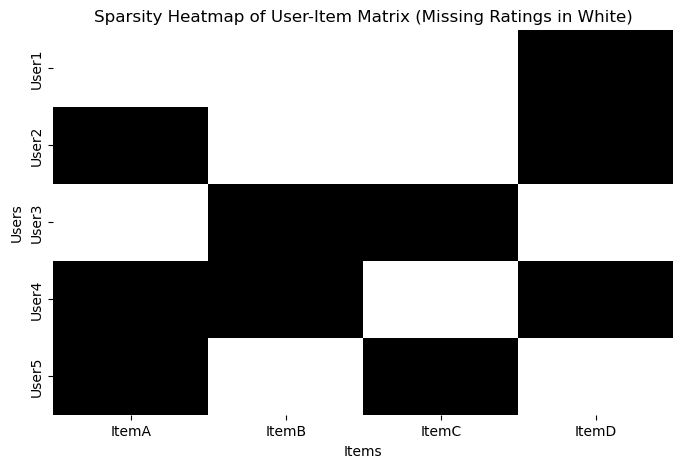

In [32]:
# Step 4: Visualize the Matrix Sparsity
plt.figure(figsize=(8, 5))
sns.heatmap(interaction_matrix.isna(), cbar=False, cmap="Greys")
plt.title("Sparsity Heatmap of User-Item Matrix (Missing Ratings in White)")
plt.xlabel("Items")
plt.ylabel("Users")
plt.show()

In [33]:
# Step 5: Basic Exploration
# Most active users (who rated the most items)
user_activity = interaction_matrix.count(axis=1).sort_values(ascending=False)
print("\nMost Active Users (by number of items rated):")
print(user_activity)

# Most rated items
item_popularity = interaction_matrix.count(axis=0).sort_values(ascending=False)
print("\nMost Rated Items:")
print(item_popularity)

# Average rating per item
item_avg_rating = interaction_matrix.mean(axis=0).sort_values(ascending=False)
print("\nAverage Rating per Item:")
print(item_avg_rating)


Most Active Users (by number of items rated):
user
User1    3
User2    2
User3    2
User5    2
User4    1
dtype: int64

Most Rated Items:
item
ItemB    3
ItemC    3
ItemA    2
ItemD    2
dtype: int64

Average Rating per Item:
item
ItemD    4.500000
ItemC    4.000000
ItemB    3.666667
ItemA    3.500000
dtype: float64


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---


This exercise provides the most important step for the complex similarity computations.It also introduces the foundation of the filtering ,the user item interaction matrix,it also creates. a matrix from teh simulated user ratings and its visualized sparsity ,understanding the data structure where the rows were users ,columns are items and the values represent the ratings.By looking into the matrix we can identify the high level trends like as most active users and the popular items.  



#### **Exercise 13: User-Based Collaborative Filtering Using Cosine Similarity**

#### Objective:
Learn how to compute similarity between users based on their rating behavior and use that similarity to recommend items using user-based collaborative filtering.

#### Instructions:

1. **Load or Reuse the User-Item Matrix**  
   Use the matrix from Exercise 12 or recreate it if needed.

2. **Fill Missing Values**  
   For similarity computation, replace NaNs with 0 to create a dense matrix.

3. **Compute Cosine Similarity Between Users**  
   Use `sklearn.metrics.pairwise.cosine_similarity` to calculate similarity between each pair of users.

4. **Create a User Similarity DataFrame**  
   Turn the similarity matrix into a labeled DataFrame for better readability.

5. **Identify Most Similar Users**  
   For a target user, identify the top-N most similar users based on similarity scores.

6. **Generate Recommendations**  
   Recommend items that the similar users rated highly but the target user has not rated.

7. **Interpret Results**  
   Explain the logic of the recommendations made and how user similarity drives this process.

---

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Simulate user-item rating data
data = {
    'user_id': ['User1', 'User1', 'User1', 'User2', 'User2', 'User3', 'User3', 'User3', 'User4', 'User4', 'User5', 'User5'],
    'item': ['ItemA', 'ItemB', 'ItemC', 'ItemA', 'ItemC', 'ItemA', 'ItemB', 'ItemD', 'ItemB', 'ItemC', 'ItemC', 'ItemD'],
    'rating': [5, 3, 4, 4, 5, 2, 5, 3, 4, 3, 5, 4]
}

ratings_df = pd.DataFrame(data)
ratings_df


,user_id,item,rating
0,User1,ItemA,5
1,User1,ItemB,3
2,User1,ItemC,4
3,User2,ItemA,4
4,User2,ItemC,5
5,User3,ItemA,2
6,User3,ItemB,5
7,User3,ItemD,3
8,User4,ItemB,4
9,User4,ItemC,3


In [35]:
# Step 2: Create user-item matrix
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='item', values='rating')

# Step 3: Fill NaN with 0 for cosine similarity
user_item_filled = user_item_matrix.fillna(0)

# Step 4: Compute cosine similarity between users
cos_sim = cosine_similarity(user_item_filled)
user_similarity_df = pd.DataFrame(cos_sim, index=user_item_filled.index, columns=user_item_filled.index)
user_similarity_df


user_id,User1,User2,User3,User4,User5
user_id,,,,,
User1,1.000000,0.883452,0.573539,0.678823,0.441726
User2,0.883452,1.000000,0.202678,0.468521,0.609756
User3,0.573539,0.202678,1.000000,0.648886,0.304017
User4,0.678823,0.468521,0.648886,1.000000,0.468521
User5,0.441726,0.609756,0.304017,0.468521,1.000000


In [36]:
# Step 5: Pick a target user and find similar users
target_user = 'User1'
similar_users = user_similarity_df[target_user].sort_values(ascending=False)[1:]  # Exclude self

# Step 6: Recommend items
target_user_ratings = user_item_matrix.loc[target_user]
unrated_items = target_user_ratings[target_user_ratings.isna()].index

recommendation_scores = {}

for item in unrated_items:
    total_score = 0
    sim_sum = 0
    for user in similar_users.index:
        if not np.isnan(user_item_matrix.loc[user, item]):
            similarity = user_similarity_df.loc[target_user, user]
            rating = user_item_matrix.loc[user, item]
            total_score += similarity * rating
            sim_sum += similarity
    if sim_sum > 0:
        recommendation_scores[item] = total_score / sim_sum

recommendations_df = pd.DataFrame.from_dict(recommendation_scores, orient='index', columns=['Predicted Rating'])
recommendations_df.sort_values(by='Predicted Rating', ascending=False, inplace=True)

recommendations_df.reset_index().rename(columns={'index': 'Recommended Item'})

,Recommended Item,Predicted Rating
0,ItemD,3.435084


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise we demonstrate that the fundamental shift from the association based to recommendations to a system that is used by user behaviour patterns.We also performed user based collaborative filtering.The cosine similarity between the users based on the item ratings .The important point is that  the similar users will like the similar items ,find the target user most similar recommended items where the target would not have noticed. 

#### **Exercise 14: Item-Based Collaborative Filtering Using Cosine Similarity**

#### Objective:
Learn how to implement item-based collaborative filtering by identifying similarities between items based on user ratings, and recommending similar items to users.

#### Instructions:

1. **Use the Same User-Item Rating Matrix**  
   Reuse the matrix from previous exercises or define a similar one with users as rows and items as columns.

2. **Fill Missing Values**  
   Replace NaN values with 0 to allow similarity calculation.

3. **Compute Cosine Similarity Between Items**  
   Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute similarity between all items (columns of the matrix).

4. **Create Item Similarity DataFrame**  
   Convert the result into a labeled DataFrame to make the item-item similarity matrix easier to interpret.

5. **Select a Target Item**  
   Choose an item (e.g., `ItemA`) that a user liked, and find the most similar items based on cosine similarity.

6. **Recommend Similar Items**  
   Return a ranked list of items most similar to the selected item, excluding the item itself.

7. **Interpret Recommendations**  
   Explain how and why the recommended items are similar and how this technique is useful in practical recommendation systems.

---

In [37]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Define the user-item rating matrix
data = {
    'ItemA': [5, 4, 0, 1],
    'ItemB': [3, 0, 2, 5],
    'ItemC': [4, 0, 4, 3],
    'ItemD': [0, 2, 4, 0],
    'ItemE': [1, 2, 0, 4]
}
user_item_matrix = pd.DataFrame(data, index=['User1', 'User2', 'User3', 'User4'])

user_item_matrix


,ItemA,ItemB,ItemC,ItemD,ItemE
User1,5,3,4,0,1
User2,4,0,0,2,2
User3,0,2,4,4,0
User4,1,5,3,0,4


In [38]:
# Step 2: Fill missing values (assuming 0 indicates unrated)
filled_matrix = user_item_matrix.fillna(0)

# Step 3: Compute cosine similarity between items (columns)
item_similarity = cosine_similarity(filled_matrix.T)

# Step 4: Create item similarity DataFrame
item_sim_df = pd.DataFrame(item_similarity, index=filled_matrix.columns, columns=filled_matrix.columns)
item_sim_df

,ItemA,ItemB,ItemC,ItemD,ItemE
ItemA,1.000000,0.500626,0.554257,0.276026,0.572420
ItemB,0.500626,1.000000,0.886716,0.290191,0.814191
ItemC,0.554257,0.886716,1.000000,0.558744,0.545279
ItemD,0.276026,0.290191,0.558744,1.000000,0.195180
ItemE,0.572420,0.814191,0.545279,0.195180,1.000000


In [39]:
# Step 5: Select a target item (e.g., 'ItemA') and find similar items
target_item = 'ItemA'
similar_items = item_sim_df[target_item].sort_values(ascending=False)

# Step 6: Exclude the target item and return top-N similar items
top_similar_items = similar_items.drop(target_item).head(3)

# Step 7: Display recommendations
print(f"Top items similar to {target_item}:")
print(top_similar_items)

Top items similar to ItemA:
ItemE    0.572420
ItemC    0.554257
ItemB    0.500626
Name: ItemA, dtype: float64


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise it is more often that the scalable is more than the user based filtering because there is similar items which is more static and less frequents.It is focused on the item based collaborative filtering .Instead of the comparing users,the cosine similarity between the items and how they are rated by users ,from the high similarity are often to have good candidates fro the recommendation ,where it could suggest the new items ,by identifying items similar to the user liked ones.

#### **Exercise 15: Hybrid Recommendation Strategy (Association + Collaborative Filtering)**

#### Objective:
Combine the strengths of association rule mining and collaborative filtering to generate more robust and personalized recommendations.

#### Instructions:

1. **Simulate User-Item Transactions**  
   Create a small user-item dataset that includes both:
   - Explicit ratings (for collaborative filtering), and  
   - Transaction-style purchases (for association rule mining).

2. **Generate Association Rules**  
   - Use Apriori to identify frequent itemsets and association rules.
   - Extract item-to-item recommendations based on lift or confidence.

3. **Build a User-Based Collaborative Filtering Model**  
   - Use cosine similarity on the user-item rating matrix.
   - Predict unrated items for a sample user.

4. **Hybrid Recommendation**  
   - Combine outputs from both methods:
     - Take union of association-based and collaborative filtering recommendations.
     - Or prioritize items that appear in both methods.

5. **Display Final Recommendations**  
   Print the hybrid list of recommendations for the selected user and explain how both models contributed.

---



In [40]:
# Exercise 15: Building a Hybrid Recommendation System

# Step 1: Simulate transaction data
transactions = [
    ['ItemA', 'ItemB', 'ItemC'],
    ['ItemA', 'ItemC', 'ItemE'],
    ['ItemB', 'ItemC', 'ItemE'],
    ['ItemA', 'ItemC', 'ItemD'],
    ['ItemA', 'ItemE'],
    ['ItemC', 'ItemD'],
    ['ItemA', 'ItemB', 'ItemE'],
    ['ItemB', 'ItemC'],
    ['ItemC', 'ItemE'],
    ['ItemA', 'ItemC']
]

# Step 2: One-hot encode the transaction data
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)
df


,ItemA,ItemB,ItemC,ItemD,ItemE
0,True,True,True,False,False
1,True,False,True,False,True
2,False,True,True,False,True
3,True,False,True,True,False
4,True,False,False,False,True
5,False,False,True,True,False
6,True,True,False,False,True
7,False,True,True,False,False
8,False,False,True,False,True
9,True,False,True,False,False


In [41]:
# Step 3: Apply Apriori algorithm to get frequent itemsets
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)

# Step 4: Generate association rules
assoc_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)


In [42]:
# Step 5: Simulate user-item rating matrix for collaborative filtering
ratings_data = {
    'User1': {'ItemA': 5, 'ItemB': 3, 'ItemC': 0, 'ItemD': 0, 'ItemE': 0},
    'User2': {'ItemA': 4, 'ItemB': 0, 'ItemC': 5, 'ItemD': 3, 'ItemE': 0},
    'User3': {'ItemA': 0, 'ItemB': 4, 'ItemC': 4, 'ItemD': 5, 'ItemE': 3},
    'User4': {'ItemA': 3, 'ItemB': 5, 'ItemC': 4, 'ItemD': 0, 'ItemE': 4}
}
ratings = pd.DataFrame(ratings_data).T.fillna(0)
ratings


,ItemA,ItemB,ItemC,ItemD,ItemE
User1,5,3,0,0,0
User2,4,0,5,3,0
User3,0,4,4,5,3
User4,3,5,4,0,4


In [43]:
# Step 6: Compute item-item similarity
from sklearn.metrics.pairwise import cosine_similarity

item_sim = pd.DataFrame(cosine_similarity(ratings.T), 
                        index=ratings.columns, columns=ratings.columns)
item_sim


,ItemA,ItemB,ItemC,ItemD,ItemE
ItemA,1.000000,0.600000,0.599415,0.291043,0.339411
ItemB,0.600000,1.000000,0.674342,0.485071,0.905097
ItemC,0.599415,0.674342,1.000000,0.795044,0.741738
ItemD,0.291043,0.485071,0.795044,1.000000,0.514496
ItemE,0.339411,0.905097,0.741738,0.514496,1.000000


In [44]:
# Step 7: Make collaborative predictions for User1
user = 'User1'
user_ratings = ratings.loc[user]
unseen_items = user_ratings[user_ratings == 0].index

predicted_ratings = {}
for item in unseen_items:
    similar_items = item_sim[item]
    rated_items = user_ratings[user_ratings > 0].index
    sim_scores = similar_items[rated_items]
    rating_scores = user_ratings[rated_items]
    if sim_scores.sum() > 0:
        predicted_ratings[item] = (sim_scores @ rating_scores) / sim_scores.sum()

# Sort predictions
collab_recs = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)
collab_recs = [item for item, score in collab_recs]


In [45]:
# Step 8: Generate association-based recommendations for 'ItemA'
assoc_recs = assoc_rules[assoc_rules['antecedents'].apply(lambda x: 'ItemA' in x)]
assoc_items = set()
for items in assoc_recs['consequents']:
    assoc_items.update(items)


In [46]:
# Step 9: Combine both into a hybrid recommendation
hybrid = list(assoc_items.union(collab_recs))

# Step 10: Display results
print("Association-based Recommendations for 'ItemA':", assoc_items)
print("Collaborative Filtering Recommendations for", user + ":", collab_recs)
print("Hybrid Recommendations:", hybrid)

Association-based Recommendations for 'ItemA': {'ItemE', 'ItemC'}
Collaborative Filtering Recommendations for User1: ['ItemC', 'ItemD', 'ItemE']
Hybrid Recommendations: ['ItemE', 'ItemC', 'ItemD']


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---


In this exercise we can generate a more robust and comprehensive list of recommendations ,where we need to leveeage each method by strnegths which mitigate their indiviusal weakness,Here it also exercise the synthesized previous concepts into the recommendation system which is hybrid ,it also combines the recommendations from the assocaiton rules based model and item based collaborative filtering model,it learns that the two approaches are complementary to each other where the association rules says it filters the more nuanced user preferences.


#### **Revise: September 1, 2025**